In [1]:
from time import strftime, gmtime, localtime

import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
import xgboost

import statsmodels.api as sm

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set(rc={'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'patch.linewidth': 1})
%matplotlib inline

random_state = 42
np.random.seed(random_state)

#1 - clean run through
# get data
#rf
#xgb
#mlp

#2 run bucket and run perf on xgb

#3 run bucket and run perf on relative perf

In [2]:
data = pd.read_pickle("data.pickle")
data.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET
0,1963-02-28,T,10401,32,0.613024,-0.059701,0.99,99.788054,0.012821,-0.028852,-0.011157,0.017695
1,1963-02-28,GM,12079,23,0.408998,0.074757,0.99,99.788054,0.012821,-0.028852,-0.033865,-0.005013
2,1963-02-28,XOM,11850,30,0.686189,0.175562,0.99,99.788054,0.012821,-0.028852,0.006681,0.035533
3,1963-02-28,IBM,12490,34,0.126757,-0.275333,0.99,99.788054,0.012821,-0.028852,-0.054277,-0.025425
4,1963-02-28,DD,11703,14,0.336631,0.229181,0.99,99.788054,0.012821,-0.028852,-0.036623,-0.007771


In [4]:
X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
#X = data[["VALUE", "MOMENTUM"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
y = data["EXCESSRET"].values
X.shape, y.shape

((580693, 54), (580693,))

In [5]:
# create train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

Train R-squared: 0.002097


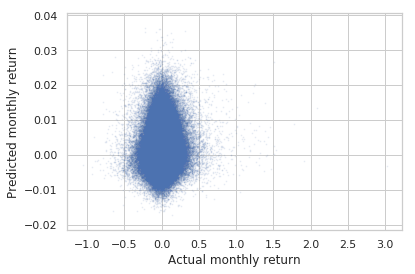

In [6]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Fitted vs. Actual
y_train_pred = model.predict(X_train)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual monthly return");
plt.ylabel("Predicted monthly return");

In [7]:
# your predictions are bad and you should feel bad
# instead of predicting monthly returns, do 3-month returns


In [ ]:
# this is possibly not the most efficient way to calculate 3-month returns

# def group_by_permno(df, permno, col="RET"):
#     retdf = df.loc[df['PERMNO']==permno]
#     retdf["TPLUS1"] = retdf["DATETIME"].shift(-1)
#     retdf[col + "1"] = retdf[col].shift(-1)
#     retdf["TPLUS2"] = retdf["DATETIME"].shift(-2)
#     retdf[col + "2"] = retdf[col].shift(-2)
#     return retdf

# group_by_permno(data, 12490, col="EXCESSRET")

In [ ]:
# unique_permno = sorted(set(data["PERMNO"].values))

# max_unique = len(unique_permno)

# dflist = []
# for i, permno in enumerate(unique_permno):
#     if i%100==1:
#         print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
#     dflist.append(group_by_permno(data, permno, col="RET"))
# print("concatenating")
# datanew = pd.concat(dflist)
# datanew.head()

In [ ]:

# dflist = []
# for i, permno in enumerate(unique_permno):
#     if i%100==1:
#         print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
#     dflist.append(group_by_permno(datanew, permno, col="EXCESSRET"))
# print("concatenating")
# datanew = pd.concat(dflist)

# datanew.head()

In [ ]:
# print(datanew.shape)
# datanew = datanew.dropna()
# print(datanew.shape)


In [ ]:
# datanew["RET3"]= (1 + datanew["RET"]) * (1 + datanew["RET1"]) * (1 + datanew["RET2"]) -1
# datanew["EXCESSRET3"]= (1 + datanew["EXCESSRET"]) * (1 + datanew["EXCESSRET1"]) * (1 + datanew["EXCESSRET2"]) -1
# datanew.head()


In [ ]:
# data = datanew[['DATETIME', 'SYMBOL', 'PERMNO', 'INDUSTRY', 
#                 'VALUE', 'MOMENTUM','MONETARYPOLICY', 'GROWTH', 'INFLATION',
#                 'RET', 'RET3', 'SP500TR', 'EXCESSRET', 'EXCESSRET3']]
# data.to_pickle("data3.pickle")
# data.head()

In [8]:
data = pd.read_pickle("data3.pickle")
data.sort_values("DATETIME")
data.reset_index(inplace=True)
data.head()

,index,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RET,RET3,EXCESSRET,EXCESSRET3
0,327,1963-02-28,ACF,10006,25,1.443624,0.096012,0.99,99.788054,0.012821,0.038700,0.116680,0.067552,0.057131
1,735,1963-03-31,ACF,10006,25,1.443624,0.133934,0.92,99.939763,0.009615,-0.009009,0.173573,-0.044473,0.066778
2,1151,1963-04-30,ACF,10006,25,1.443624,0.268752,1.00,100.074720,0.012821,0.084848,0.182715,0.036328,0.137539
3,1555,1963-05-31,ACF,10006,25,1.443624,0.189535,1.04,100.184328,0.012780,0.091620,0.040978,0.077293,0.051890
4,1947,1963-06-30,ACF,10006,25,1.443624,0.536269,1.07,100.262197,0.012780,-0.001289,0.069072,0.018909,0.047046


In [9]:
# create X and y numpy arrays

X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
#X = data[["VALUE", "MOMENTUM"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
# use 3-month returns
y = data["EXCESSRET3"].values
X.shape, y.shape

((570621, 54), (570621,))

In [10]:
# split and scale for regularization 
# note that holding out random rows is problematic for time series
# should use walkforward cross-validation 
# even then resulting metrics should be viewed with suspicion

# for this exercise use last test_index rows for holdout

# split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

xval_index = len(data.loc[data["DATETIME"] > pd.to_datetime("2013-01-01")])
test_index = len(data.loc[data["DATETIME"] > pd.to_datetime("2016-01-01")])

total_obs, predictors = X.shape
train_end = total_obs-xval_index
xval_end =  total_obs-test_index

train_indexes      = list(range(train_end))
train_xval_indexes = list(range(xval_end))
xval_indexes       = list(range(train_end,xval_end))
test_indexes       = list(range(xval_end, total_obs))

X_train = X[train_indexes]
y_train = y[train_indexes]

X_train_xval = X[train_xval_indexes]
y_train_xval = y[train_xval_indexes]

X_xval = X[xval_indexes]
y_xval = y[xval_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

print(total_obs)
print(X_train.shape)
print(X_xval.shape)
print(X_test.shape)
print(X_train_xval.shape)

# scale
scaler = preprocessing.StandardScaler()
# train scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
# transform only!
X_train_xval_scaled = scaler.transform(X_train_xval)
X_xval_scaled = scaler.transform(X_xval)
X_test_scaled = scaler.transform(X_test)




570621
(511943, 54)
(36458, 54)
(22220, 54)
(548401, 54)


In [11]:
print(X_train_scaled.shape)
print(sm.add_constant(X_train_scaled).shape)

print(X_xval_scaled.shape)
print(sm.add_constant(X_xval_scaled).shape)

#WAT

(511943, 54)
(511943, 55)
(36458, 54)
(36458, 54)


In [12]:
rows = X_train_scaled.shape[0]
z = np.ones((rows,1))
X_train_scaled_constant = np.hstack((z, X_train_scaled))
print(X_train_scaled_constant.shape)

rows = X_xval_scaled.shape[0]
z = np.ones((rows,1))
X_xval_scaled_constant = np.hstack((z, X_xval_scaled))
print(X_xval_scaled_constant.shape)


(511943, 55)
(36458, 55)


In [13]:
#X_train_scaled_const = sm.add_constant(X_train_scaled)
#X_xval_scaled_const = sm.add_constant(X_xval_scaled)
print(X_xval_scaled_constant.shape)
model = sm.OLS(y_train, X_train_scaled_constant)
results = model.fit()

y_train_predict = results.predict(X_train_scaled_constant).reshape(y_train.shape)
residuals = y_train - y_train_predict

print("Prediction mean: %.6f" % np.mean(y_train_predict))
print("Prediction SD:   %.6f" % np.mean(np.std(y_train_predict)))

results.summary()

(36458, 55)
Prediction mean: 0.007605
Prediction SD:   0.011941


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     59.58
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        01:16:44   Log-Likelihood:             2.3791e+05
No. Observations:              511943   AIC:                        -4.757e+05
Df Residuals:                  511889   BIC:                        -4.751e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.000     35.790      0.000       0.007       0.008
x1             0.0077      0.000     30.696      0.000       0.007       0.008
x2             0.0057      0.000     26.407      0.000       0.005       0.006
x3            -0.0007      0.000     -3.293      0.001      -0.001      -0.000
x4            -0.0041      0.000    -18.024      0.000      -0.005      -0.004
x5             0.0032      0.000     12.818      0.000       0.003       0.004
x6             0.0007      0.000      3.237      0.001       0.000       0.001
x7            -0.0005      0.000     -2.244      0.025      -0.001   -6.04e-05
x8             0.0009      0.000      4.576      0.000       0.001       0.001
x9             0.0006      0.000      2.891      0.004       0.000       0.001
x10            0.0003      0.000      1.426      0.154      -0.000       0.001
x11            0.0012      0.000      5.564      0.000       0.001       0.002
x12           -0.0004      0.000     -1.981      0.048      -0.001   -4.42e-06
x13            0.0005      0.000      2.533      0.011       0.000       0.001
x14            0.0002      0.000      0.847      0.397      -0.000       0.001
x15          -7.2e-05      0.000     -0.346      0.729      -0.000       0.000
x16           -0.0002      0.000     -1.110      0.267      -0.001       0.000
x17         5.688e-05      0.000      0.270      0.787      -0.000       0.000
x18            0.0007      0.000      3.421      0.001       0.000       0.001
x19            0.0026      0.000     12.412      0.000       0.002       0.003
x20           -0.0003      0.000     -1.225      0.221      -0.001       0.000
x21         9.115e-05      0.000      0.431      0.667      -0.000       0.001
x22           -0.0011      0.000     -5.050      0.000      -0.001      -0.001
x23           -0.0005      0.000     -2.318      0.020      -0.001   -7.45e-05
x24           -0.0009      0.000     -4.265      0.000      -0.001      -0.000
x25           -0.0014      0.000     -6.481      0.000      -0.002      -0.001
x26        -2.521e-06      0.000     -0.012      0.991      -0.000       0.000
x27            0.0002      0.000      0.753      0.452      -0.000       0.001
x28         3.521e-05      0.000      0.167      0.867      -0.000       0.000
x29           -0.0013      0.000     -6.206      0.000      -0.002      -0.001
x30            0.0008      0.000      3.614      0.000       0.000       0.001
x31            0.0003      0.000      1.477      0.140      -0.000       0.001
x32            0.0003      0.000      1.377      0.168      -0.000       0.001
x33           -0.0008      0.000     -3.905      0.000      -0.001      -0.000
x34            0.0004      0.000      1.722      0.085   -4.99e-05       0.001
x35         5.176e-05      0.000      0.244      0.807      -0.000       0.000
x3

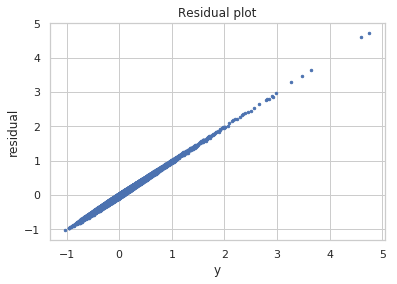

In [14]:
# plot residuals
plt.scatter(y_train, residuals, s=6);
plt.title('Residual plot');
plt.xlabel('y');
plt.ylabel('residual');
# predictions are near 0
# ys have a broad spread
# it's almost like plotting y vs. y

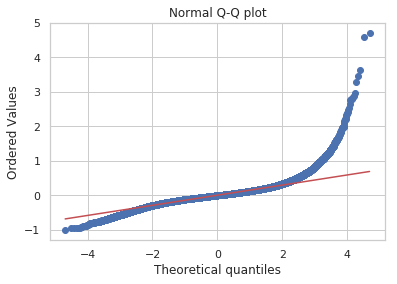

In [15]:
# q-q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

# large outliers


Train R-squared: 0.006131
Xval R-squared: 0.002004


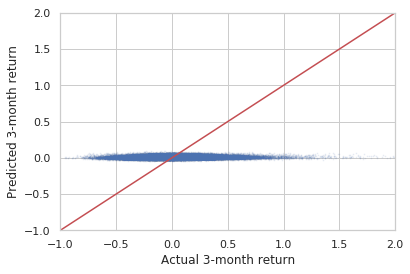

In [16]:
# Fitted vs. Actual
y_train_pred = results.predict(X_train_scaled_constant)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

# xval R-squared 
y_xval_pred = results.predict(X_xval_scaled_constant)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
#plt.ylim(-0.05, 0.15) 
plt.ylim(-1, 2) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-1, 2])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [17]:
# large drop in xval R-squared in xval v. train is indicative of overfitting


In [18]:
# create CV folds 
# this will have serial correlation issue
# use walkforward crossvalidation instead

# kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)


Train R-squared: 0.006131
Xval R-squared: 0.002004


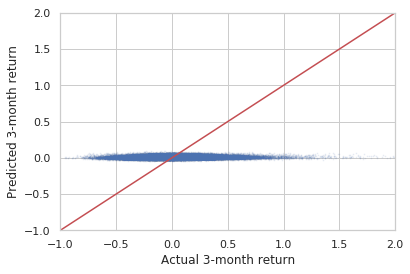

In [19]:
# do same with sklearn instead of statsmodels
model = LinearRegression()

#scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="r2")
#print(scores)
#print("Linear Reg Mean Score: ", np.mean(scores))

# Build the model
model.fit(X_train_scaled, y_train)

# Fitted vs. Actual
y_train_pred = model.predict(X_train_scaled)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))

plt.ylim(-1, 2) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-1, 2])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [20]:
# same result as statsmodels so that's good

In [21]:
def build_grid_search_est(model, X, y, params, cv):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv, scoring="r2", n_jobs=-1)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    return grid_est

Lasso Model:
alphas to test
[1.00000000e-06 3.16227766e-06 1.00000000e-05 3.16227766e-05
 1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.00200, std: 0.00000, params: {'alpha': 1e-06},
 mean: 0.00201, std: 0.00000, params: {'alpha': 3.162277660168379e-06},
 mean: 0.00201, std: 0.00000, params: {'alpha': 1e-05},
 mean: 0.00204, std: 0.00000, params: {'alpha': 3.1622776601683795e-05},
 mean: 0.00211, std: 0.00000, params: {'alpha': 0.0001},
 mean: 0.00226, std: 0.00000, params: {'alpha': 0.00031622776601683794},
 mean: 0.00215, std: 0.00000, params: {'alpha': 0.001},
 mean: 0.00112, std: 0.00000, params: {'alpha': 0.0031622776601683794},
 mean: -0.00003, std: 0.00000, params: {'alpha': 0.01},
 mean: -0.00003, std: 0.00000, params: {'alpha': 0.03162277660168379},
 mean: -0.00003, std: 0.00000, params: {'alpha': 0.1},
 mean: -0.00003, std: 0.00000, params: {'alpha': 0.31622776601683794},
 mean: -0.00003, std: 0.00000, params: {'alpha': 1.0}]

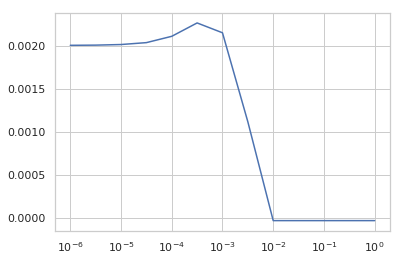

In [22]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-6, 0, 13)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Lasso(), X_train_xval_scaled, y_train_xval, params, cv=[(train_indexes, xval_indexes)])
grid_est.grid_scores_

In [23]:
grid_est.best_estimator_

Lasso(alpha=0.00031622776601683794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Train R-squared: 0.004992


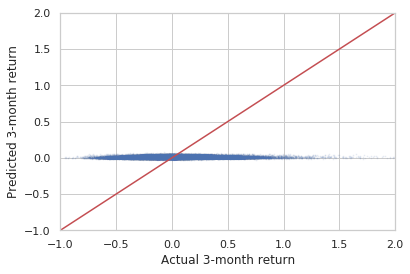

Xval R-squared: 0.002150
End: 2018-10-12 01:18:01


In [24]:
# rerun best estimator on full dataset

def run_one_model(model, X_train_scaled, y_train):

    # Build the model
    
    model.fit(X_train_scaled, y_train)

    # Evaluate
    y_train_pred = model.predict(X_train_scaled)
    print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    plt.show();
    
    return model


model=run_one_model(Lasso(alpha=0.001, random_state=random_state),
                    X_train_scaled, y_train)
y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    


Ridge Model:
alphas to test
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06]


/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.00200, std: 0.00000, params: {'alpha': 0.001},
 mean: 0.00200, std: 0.00000, params: {'alpha': 0.0031622776601683794},
 mean: 0.00200, std: 0.00000, params: {'alpha': 0.01},
 mean: 0.00200, std: 0.00000, params: {'alpha': 0.03162277660168379},
 mean: 0.00200, std: 0.00000, params: {'alpha': 0.1},
 mean: 0.00200, std: 0.00000, params: {'alpha': 0.31622776601683794},
 mean: 0.00200, std: 0.00000, params: {'alpha': 1.0},
 mean: 0.00200, std: 0.00000, params: {'alpha': 3.1622776601683795},
 mean: 0.00200, std: 0.00000, params: {'alpha': 10.0},
 mean: 0.00200, std: 0.00000, params: {'alpha': 31.622776601683793},
 mean: 0.00200, std: 0.00000, params: {'alpha': 100.0},
 mean: 0.00200, std: 0.00000, params: {'alpha': 316.22776601683796},
 mean: 0.00201, std: 0.00000, params: {'alpha': 1000.0},
 mean: 0.00201, std: 0.00000, params: {'alpha': 3162.2776601683795},
 mean: 0.00203, std: 0.00000, params: {'alpha': 10000.0},
 mean: 0.00206, std: 0.00000, params: {'alpha': 31622.776601683792}

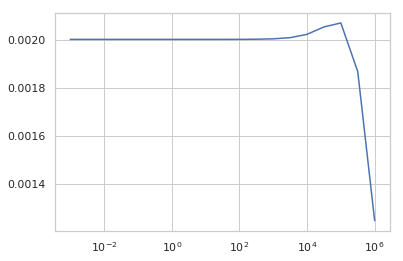

In [25]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-3, 6, 19)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Ridge(), X_train_xval_scaled, y_train_xval, params, cv=[(train_indexes, xval_indexes)])
grid_est.grid_scores_


In [26]:
grid_est.best_estimator_


Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Train R-squared: 0.006128


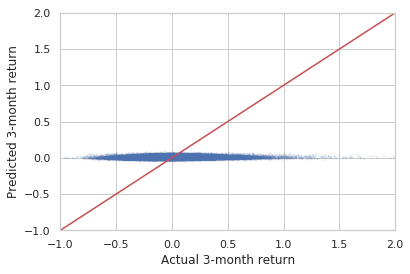

Xval R-squared: 0.002025
End: 2018-10-12 01:18:13


In [27]:
# do the best one on full train

model = run_one_model(Ridge(alpha=10000, random_state=random_state),
              X_train_scaled, y_train)

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    


Elastic Net Grid Search
{'alpha': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06]), 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/linear_model

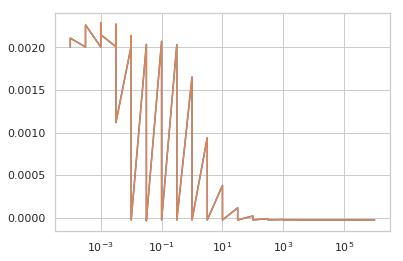

In [28]:
print("Elastic Net Grid Search")
params = {
    "alpha": np.logspace(-4, 6, 21),
    "l1_ratio": np.linspace(0.0, 1.0, 11)
}

print(params)

grid_est = build_grid_search_est(ElasticNet(), 
                                 X_train_xval_scaled, 
                                 y_train_xval, 
                                 params, cv=[(train_indexes, xval_indexes)])


In [29]:
grid_est.best_estimator_


ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Train R-squared: 0.006113


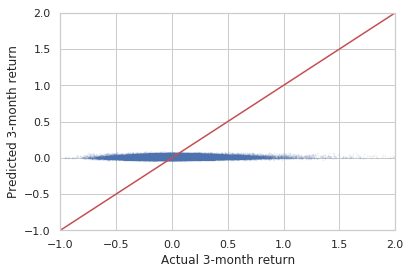

Xval R-squared: 0.002099
End: 2018-10-12 01:37:56


In [30]:
model = run_one_model(ElasticNet(alpha=0.0001, l1_ratio=0.9, random_state=random_state),
              X_train_scaled, y_train)

y_xval_pred = model.predict(X_xval_scaled)
print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    



In [31]:
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
classifiers=[est for est in all_estimators() if not issubclass(est[1], ClassifierMixin)]

estimators = []
for name, class_ in all_estimators():
    if not issubclass(class_, sklearn.base.ClassifierMixin):
        if hasattr(class_, 'predict'):
            print(class_)
            estimators.append(class_)

<class 'sklearn.linear_model.bayes.ARDRegression'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
<class 'sklearn.cluster.affinity_propagation_.AffinityPropagation'>
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
<class 'sklearn.mixture.bayesian_mixture.BayesianGaussianMixture'>
<class 'sklearn.linear_model.bayes.BayesianRidge'>
<class 'sklearn.cluster.birch.Birch'>
<class 'sklearn.cross_decomposition.cca_.CCA'>
<class 'sklearn.mixture.dpgmm.DPGMM'>
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
<class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>
<class 'sklearn.tree.tree.ExtraTreeRegressor'>
<class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
<class 'sklearn.mixture.gmm.GMM'>
<class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>
<class 'sklearn.gaussian_process.gaussian_process.GaussianProcess'>
<class 'sklearn.gaussian_process.gpr.GaussianProcessRegressor'>
<class 'sklearn.ensemble.gr

/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/ubuntu/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functi

In [32]:
# tune Random Forest
# from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = sklearn.ensemble.forest.RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 64, cv = kfold, verbose=2, random_state=42, n_jobs = 4)
# # Fit the random search model
# rf_random.fit(X_train_scaled, y_train)
# rf_random.best_params_


In [33]:
# ones commented out twice didn't work at all, or took very long
# others were OK but not good enough to keep 

estimators = [
     sklearn.linear_model.base.LinearRegression(),
     xgboost.XGBRegressor(n_estimators=400,
                          max_depth=8),
     sklearn.ensemble.forest.RandomForestRegressor(),
#     sklearn.ensemble.forest.ExtraTreesRegressor(),
     sklearn.linear_model.coordinate_descent.Lasso(alpha=0.0001, random_state=random_state),
     sklearn.linear_model.ridge.Ridge(alpha=3162.2776601683795, random_state=random_state),
#     sklearn.linear_model.coordinate_descent.ElasticNet(alpha=0.0001, l1_ratio=0.9, random_state=random_state),
#     sklearn.ensemble.bagging.BaggingRegressor(),
#     sklearn.ensemble.gradient_boosting.GradientBoostingRegressor(),
#     #sklearn.ensemble.weight_boosting.AdaBoostRegressor(),
#     sklearn.kernel_ridge.KernelRidge(),
#     sklearn.linear_model.bayes.BayesianRidge(),
#     sklearn.linear_model.huber.HuberRegressor,
#     sklearn.linear_model.least_angle.Lars(),
#     sklearn.linear_model.least_angle.LassoLars(),
#     sklearn.linear_model.least_angle.LassoLarsIC(),
#     sklearn.linear_model.omp.OrthogonalMatchingPursuit(),
#     sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor(),
# #     sklearn.linear_model.ransac.RANSACRegressor,
#     sklearn.linear_model.stochastic_gradient.SGDRegressor(),
# #    sklearn.neighbors.regression.KNeighborsRegressor(),
     sklearn.neural_network.multilayer_perceptron.MLPRegressor(hidden_layer_sizes=(32,8)), 
#     sklearn.svm.classes.LinearSVR(),
# #    sklearn.svm.classes.NuSVR(),
# #    sklearn.svm.classes.SVR(),
]

Start: 2018-10-12 03:37:47
LR
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Train R-squared: 0.006131


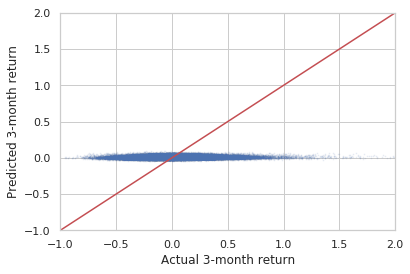

Xval R-squared: 0.002004
End: 2018-10-12 03:37:50
------------------------------------------------------------
Start: 2018-10-12 03:37:50
XGB
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train R-squared: 0.281454


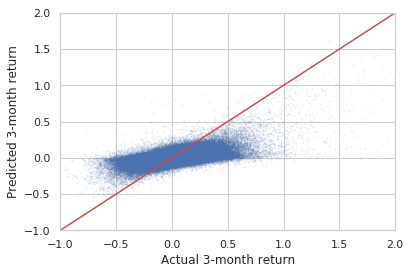

Xval R-squared: 0.107602
End: 2018-10-12 03:46:54
------------------------------------------------------------
Start: 2018-10-12 03:47:02
RF
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Train R-squared: 0.854860


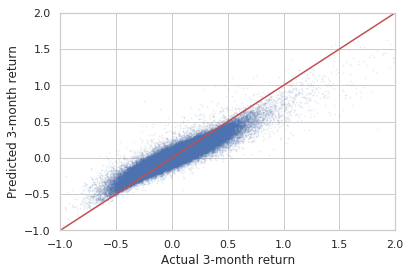

Xval R-squared: 0.035048
End: 2018-10-12 03:48:09
------------------------------------------------------------
Start: 2018-10-12 03:48:10
LASSO
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Train R-squared: 0.006109


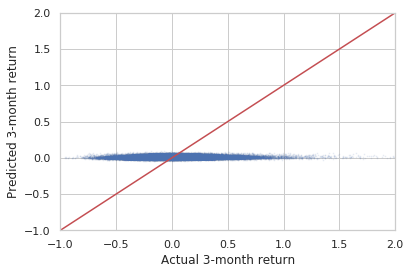

Xval R-squared: 0.002109
End: 2018-10-12 03:48:14
------------------------------------------------------------
Start: 2018-10-12 03:48:14
RIDGE
Ridge(alpha=3162.2776601683795, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=42, solver='auto',
   tol=0.001)
Train R-squared: 0.006131


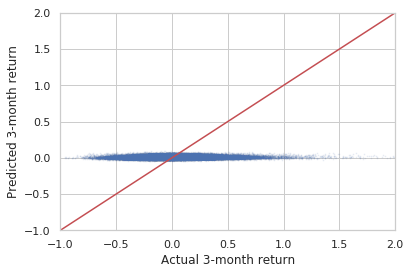

Xval R-squared: 0.002011
End: 2018-10-12 03:48:16
------------------------------------------------------------
Start: 2018-10-12 03:48:16
MLP
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Train R-squared: 0.003735


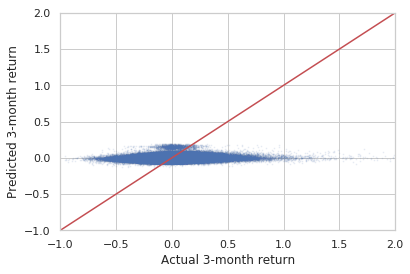

Xval R-squared: -0.013343
End: 2018-10-12 03:48:26
------------------------------------------------------------


In [37]:
estimator_names = ["LR", "XGB", "RF", "LASSO", "RIDGE", "MLP"]

for estname, est in zip(estimator_names, estimators):
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    model = run_one_model(est, X_train_scaled, y_train)
    y_xval_pred = model.predict(X_xval_scaled)
    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")
    #predict on full X
    data[estname] = model.predict(X)

data.to_pickle("data_forecast_relative.pickle")



Start: 2018-10-12 01:49:05
RF
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Train R-squared: 0.853595


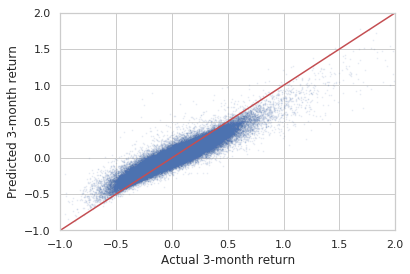

Xval R-squared: 0.043454
End: 2018-10-12 01:50:13
------------------------------------------------------------


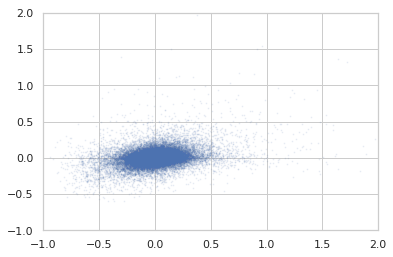

Test R-squared: 0.067320
End: 2018-10-12 01:50:13
------------------------------------------------------------


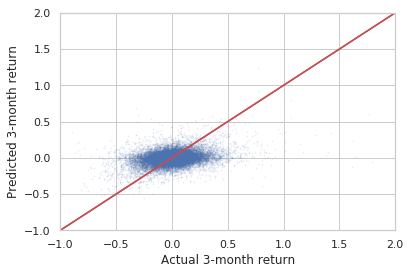

In [35]:
    estname = "RF"
    est = sklearn.ensemble.forest.RandomForestRegressor()
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    rf_model = run_one_model(est, X_train_scaled, y_train)
    y_xval_pred = rf_model.predict(X_xval_scaled)

    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")
    #predict on full X
    plt.scatter(y_xval, y_xval_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])
    plt.show()

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    
    y_test_pred = rf_model.predict(X_test_scaled)
    
    print ("Test R-squared: %0.6f" % sklearn.metrics.r2_score(y_test, y_test_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_test, y_test_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");

Start: 2018-10-12 01:50:13
XGB
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Train R-squared: 0.281454


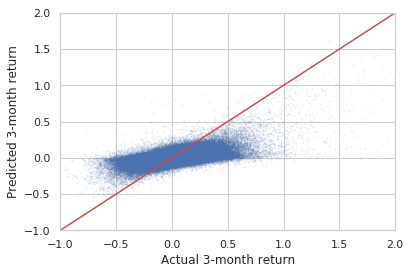

Xval R-squared: 0.107602
End: 2018-10-12 01:58:35
------------------------------------------------------------


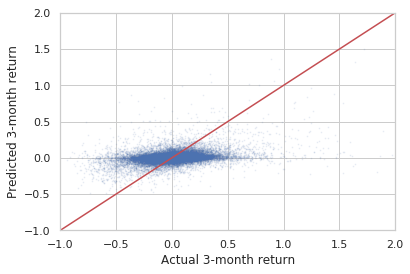

Test R-squared: 0.105686
End: 2018-10-12 01:58:35
------------------------------------------------------------


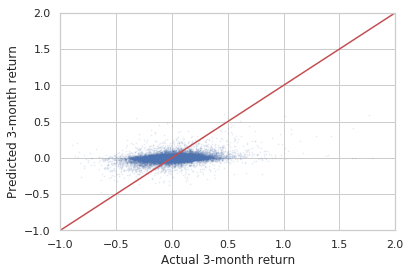

In [36]:
    estname = "XGB"
    est = xgboost.XGBRegressor(n_estimators=400,
                               max_depth=8)
    print(strftime("Start: %Y-%m-%d %H:%M:%S", localtime()))    
    print(estname)
    print(est)
    xgb_model = run_one_model(est, X_train_scaled, y_train)
    
    y_xval_pred = xgb_model.predict(X_xval_scaled)
    
    print ("Xval R-squared: %0.6f" % sklearn.metrics.r2_score(y_xval, y_xval_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_xval, y_xval_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");
    
    plt.show()

    y_test_pred = xgb_model.predict(X_test_scaled)
    
    print ("Test R-squared: %0.6f" % sklearn.metrics.r2_score(y_test, y_test_pred))
    print(strftime("End: %Y-%m-%d %H:%M:%S", localtime()))    
    print("------------------------------------------------------------")

    plt.scatter(y_test, y_test_pred, alpha=0.1, s=0.5);
    #plt.ylim(-0.05, 0.15) 
    plt.ylim(-1, 2) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-1, 2])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");